# Excercise 2

Installation of [```cmdstanpy```](https://cmdstanpy.readthedocs.io/en/v0.9.68/index.html)
1. Install ```cmdstanpy``` package
2. Install cmdstan
2. Create a dataset (as a dictionary) of F+L binary samples with F zeros and L ones, with F=number of letters in first name, L=number of letters in last name. Dictionary needs to consist of N=F+L, and y = list of samples.
3. Create a cmdstanpy model from ```bern_1.stan``` code provided.
4. Sample from the model using the dataset and ```.sample()``` method
5. Extract $\theta$ variable and create its histogram.
6. Using ```.summary()``` method get mean, median and 5% and 95% quantiles of theta, and mark them on the histogram.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

bernoulli_model = CmdStanModel(stan_file = 'bern_1.stan')
bern_fit = bernoulli_model.sample(data = 'bern_1.data.json')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


(array([ 32.,  95., 173., 283., 363., 434., 444., 495., 402., 381., 286.,
        216., 135., 105.,  67.,  39.,  27.,  13.,   8.,   2.]),
 array([0.0389007 , 0.07725042, 0.11560013, 0.15394985, 0.19229956,
        0.23064928, 0.26899899, 0.3073487 , 0.34569842, 0.38404814,
        0.42239785, 0.46074757, 0.49909728, 0.53744699, 0.57579671,
        0.61414643, 0.65249614, 0.69084585, 0.72919557, 0.76754528,
        0.805895  ]),
 <BarContainer object of 20 artists>)

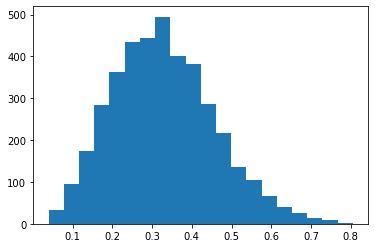

In [6]:
theta = bern_fit.stan_variable('theta')
plt.hist(theta, bins=20)

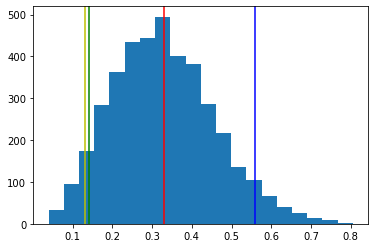

In [7]:
summary = bern_fit.summary()
summary = summary.iloc[1]
plt.hist(theta, bins=20)
plt.axvline(summary['Mean'], color='r')
plt.axvline(summary['StdDev'], color='y')
plt.axvline(summary['5%'], color='g')
plt.axvline(summary['95%'], color='b')
plt.show()